# MLOps Zoomcamp 2023 - Homework #2


# Q1. Install the package

## What's the version that you have?

In [3]:
!mlflow --version

mlflow, version 2.3.2


### The version of  mlflow : 2.3.2

# Q2. Download and preprocess the data

- We'll use the Green Taxi Trip Records dataset to predict the amount of tips for each trip.

- We will load the data from the folder `Week 2- Experiment Tracking\week2-homework2\data`,
fit a DictVectorizer on the training set (January 2022 data),
save the preprocessed datasets and the DictVectorizer to disk.

- Our task is to download the datasets and then execute this command:

    `python preprocess_data.py --raw_data_path <TAXI_DATA_FOLDER> --dest_path ./output`

- Tip: go to 02-experiment-tracking/homework/ folder before executing the command and change the value of <TAXI_DATA_FOLDER> to the location where you saved the data.

## So what's the size of the saved DictVectorizer file?

In [12]:
import os

file_path = './output/dv.pkl'
file_size = os.path.getsize(file_path)

print(f"The size of dv.pkl is {file_size} bytes.")

The size of dv.pkl is 153660 bytes.


### The size of dv.pkl : 154 KB

# Q3. Train a model with autolog

- We will train a `RandomForestRegressor` (from Scikit-Learn) on the taxi dataset.

- We have prepared the training script `train.py` for this exercise, which can be also found in the folder `Week 2- Experiment Tracking`.

- The script will:

    * load the datasets produced by the previous step,
    * train the model on the training set,
    * calculate the RMSE score on the validation set.

- Our task is to modify the script to enable autologging with MLflow, execute the script and then launch the MLflow UI to check that the experiment run was properly tracked.


## What is the value of the max_depth parameter?

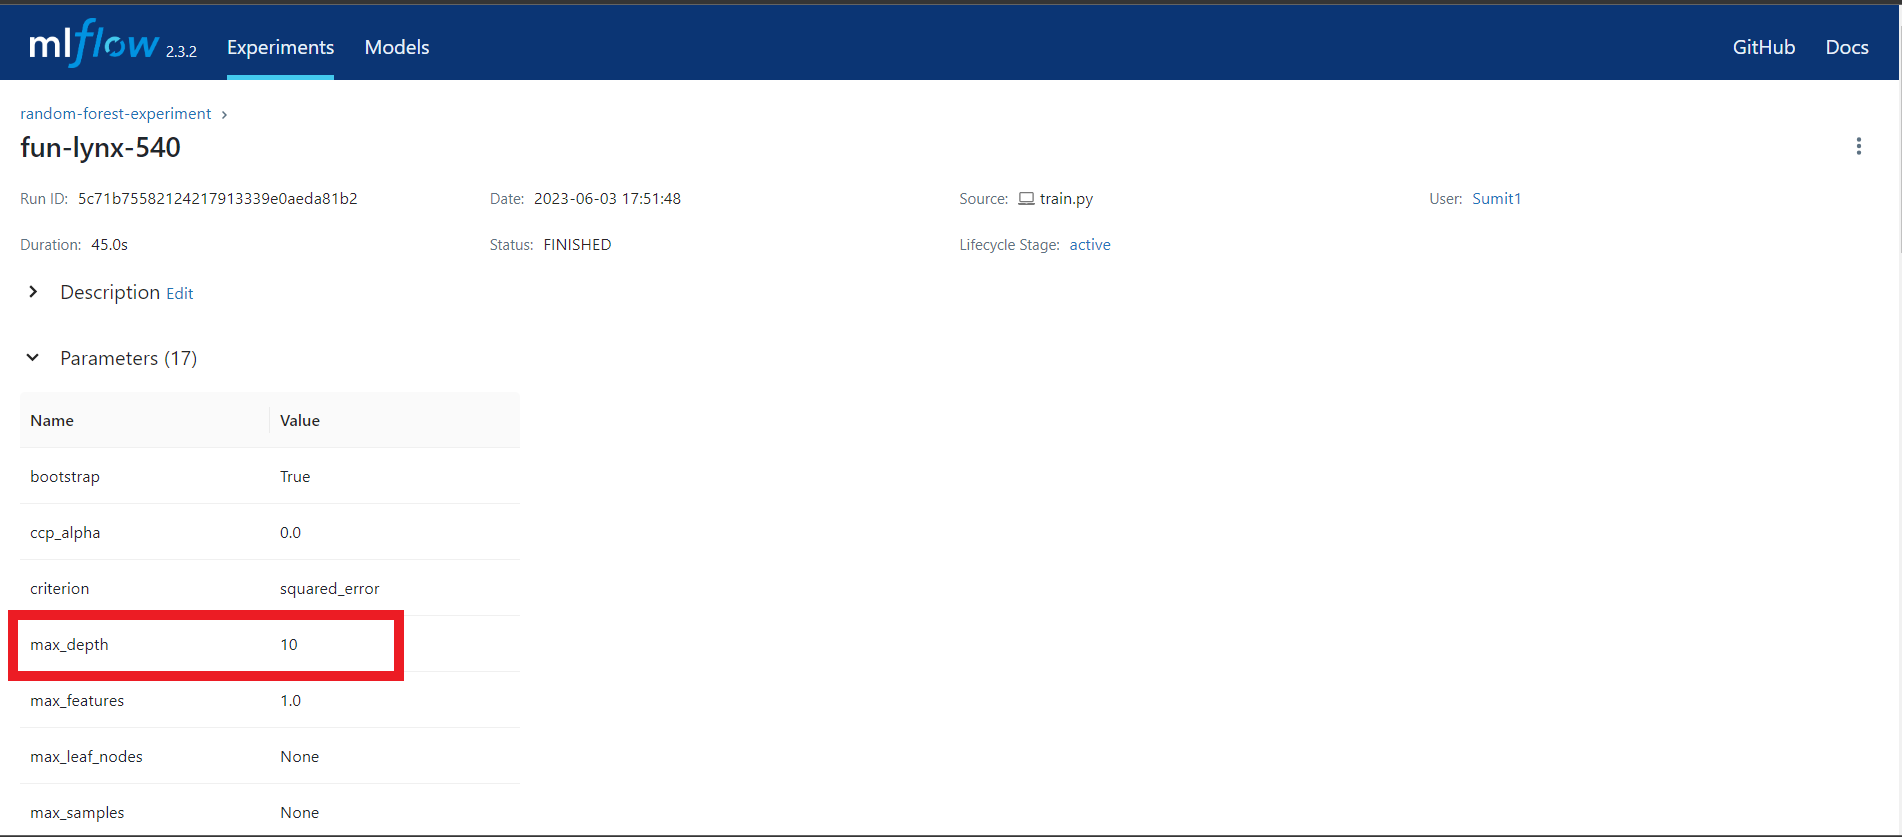

### max_depth : 10

## Launch the tracking server locally for MLflow

Now we want to manage the entire lifecycle of our ML model. In this step, we'll launch a tracking server. This way we will also have access to the model registry. 

In case of MLflow, we need to:

* launch the tracking server on your local machine,
* select a SQLite db for the backend store and a folder called `artifacts`for the artifacts store.

We should keep the tracking server running to work on the next three exercises that use the server.

`command : mlflow ui --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts`

# Q4. Tune model hyperparameters

- Now let's try to reduce the validation error by tuning the hyperparameters of the `RandomForestRegressor` using `optuna`. 
We have the script `hpo.py` for this exercise.

- Our task is to modify the script `hpo.py` and make sure that the validation RMSE is logged to the tracking server for each run of the hyperparameter optimization and run the script without passing any parameters.

- Note: Don't use autologging for this exercise.

- The idea is to just log the information that we need to answer the question below, including:

    * the list of hyperparameters that are passed to the `objective` function during the optimization,
    * the RMSE obtained on the validation set (February 2022 data).

## What's the best validation RMSE that you got?

    * 1.85
    * 2.15
    * 2.45
    * 2.85

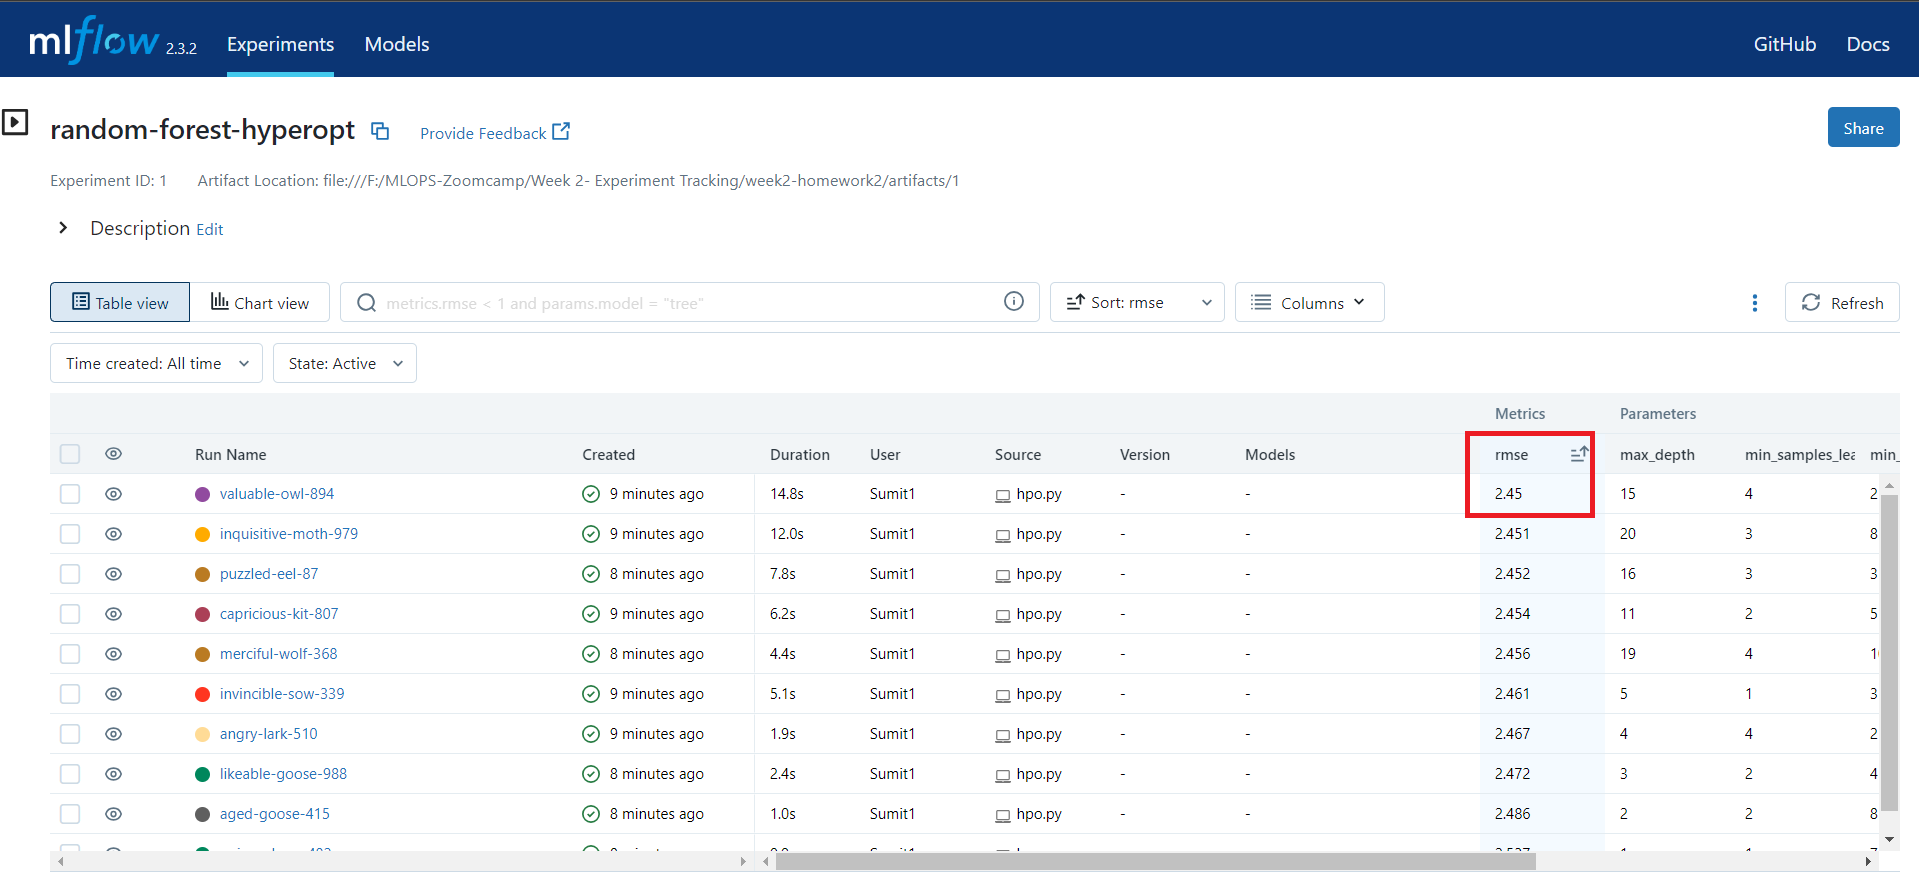

### The best validation RMSE : 2.45

## Q5. Promote the best model to the model registry

- The results from the hyperparameter optimization are quite good. So, we can assume that we are ready to test some of these models in production. 

- In this exercise, you'll promote the best model to the model registry. We have prepared a script called `register_model.py`, which will check the results from the previous step and select the top 5 runs. 

- After that, it will calculate the RMSE of those models on the test set (March 2022 data) and save the results to a new experiment called `random-forest-best-models`.

- Our task is to update the script `register_model.py` so that it selects the model with the lowest RMSE on the test set and registers it to the model registry.

- Tips for MLflow:

    * We can use the method `search_runs` from the `MlflowClient` to get the model with the lowest RMSE,
    * to register the model we can use the method `mlflow.register_model` and you will need to pass the right `model_uri` in the form of a string that looks like this: `"runs:/<RUN_ID>/model"`, and the name of the model (make sure to choose a good one!).


## What is the test RMSE of the best model?

    * 1.885
    * 2.185
    * 2.555
    * 2.955

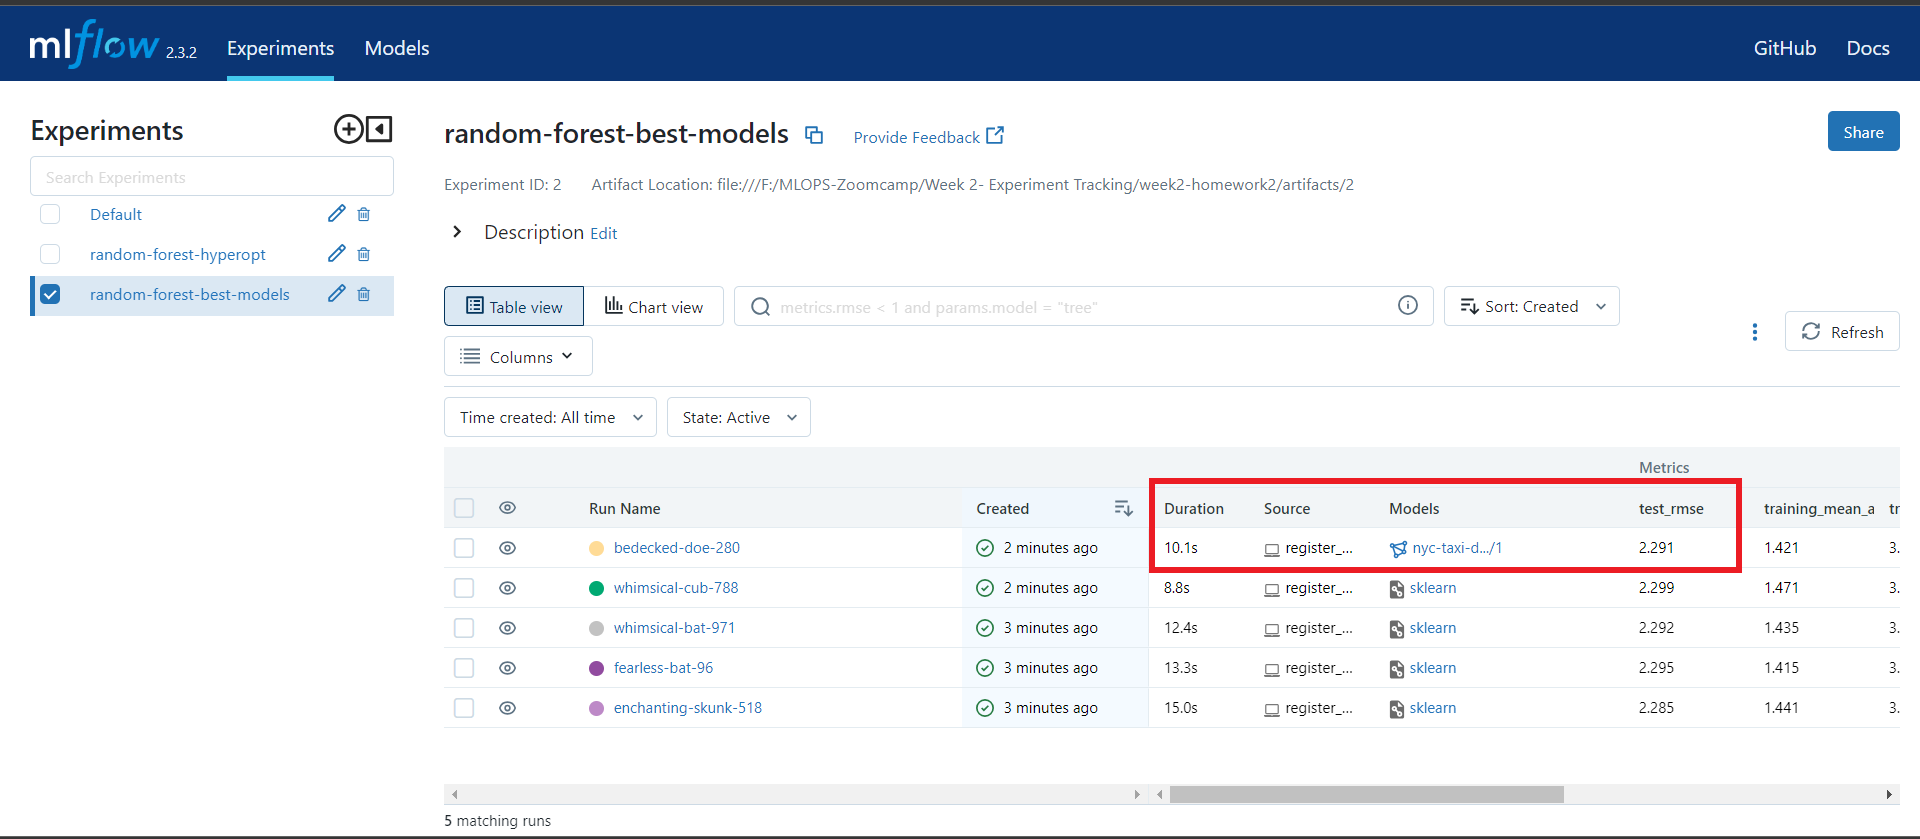

### The test RMSE of the best model : 2.185

# Q6. Model metadata

- Now we will explore our best model in the model registry using UI. 

## What information does the model registry contain about each model?

    * Version number
    * Source experiment
    * Model signature
    * All the above answers are correct

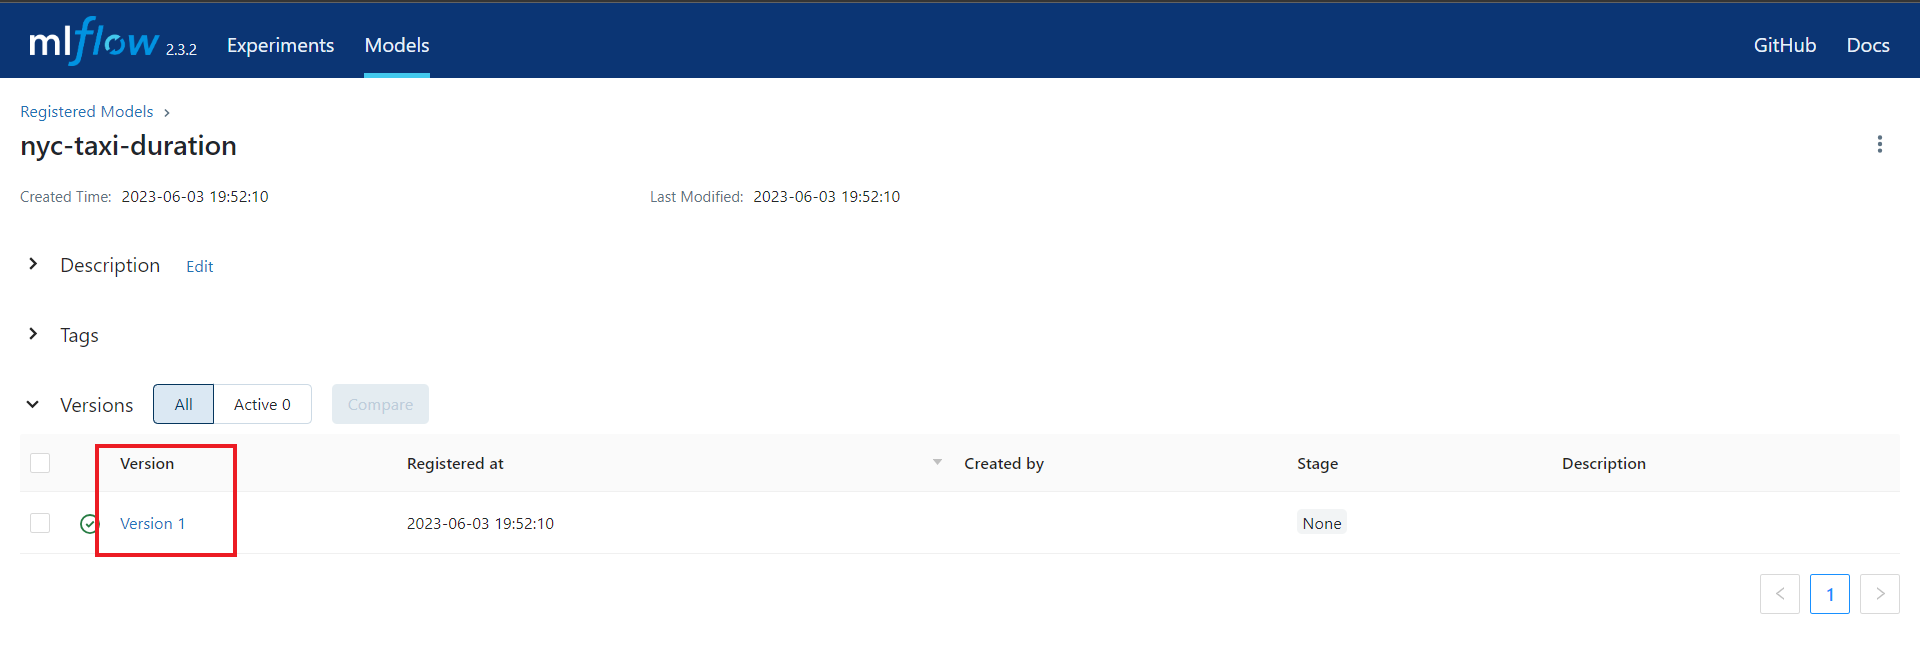

### Version number : Version 1